In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# Frequency domain dataset


In [2]:
import matplotlib.pyplot as plt
from geobipy import CircularLoop
from geobipy import FdemSystem
from geobipy import FdemData
import numpy as np

## Defining data using a frequency domain system



We can start by defining the frequencies, transmitter loops, and receiver loops
For each frequency we need to define a pair of loops



In [ ]:
frequencies = np.asarray([395.0, 822.0, 3263.0, 8199.0, 38760.0, 128755.0])

Transmitter positions are defined relative to the observation locations in the data
This is usually a constant offset for all data points.



In [ ]:
transmitters = [CircularLoop(orient="z", moment=1.0,  x=0.0, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
                CircularLoop(orient="z", moment=1.0,  x=0.0, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
                CircularLoop(orient="x", moment=-1.0, x=0.0, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
                CircularLoop(orient="z", moment=1.0,  x=0.0, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
                CircularLoop(orient="z", moment=1.0,  x=0.0, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
                CircularLoop(orient="z", moment=1.0,  x=0.0, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0)]

Receiver positions are defined relative to the transmitter



In [ ]:
receivers = [CircularLoop(orient="z", moment=1.0, x=7.93, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
             CircularLoop(orient="z", moment=1.0, x=7.91, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
             CircularLoop(orient="x", moment=1.0, x=9.03, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
             CircularLoop(orient="z", moment=1.0, x=7.91, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
             CircularLoop(orient="z", moment=1.0, x=7.91, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0),
             CircularLoop(orient="z", moment=1.0, x=7.89, y=0.0, z=0.0, pitch=0.0, roll=0.0, yaw=0.0, radius=1.0)]

Instantiate the system for the data



In [ ]:
system = FdemSystem(frequencies=frequencies, transmitterLoops=transmitters, receiverLoops=receivers)

Create some data with random co-ordinates



In [ ]:
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

data = FdemData(x=x, y=-y, z=z, systems = system)

## Reading in the Data
Of course measured field data is stored on disk. So instead we can read data from file.



In [3]:
dataFolder = "..//supplementary//Data//"
# The data file name
dataFile = dataFolder + 'Resolve2.txt'
# The EM system file name
systemFile = dataFolder + 'FdemSystem2.stm'

Read in a data set from file.



In [9]:
FD1 = FdemData().read_csv(dataFile, systemFile)

Take a look at the channel names



In [10]:
for name in FD1.channelNames:
    print(name)

In-Phase 380.0 (Hz)
In-Phase 1776.0 (Hz)
In-Phase 3345.0 (Hz)
In-Phase 8171.0 (Hz)
In-Phase 41020.0 (Hz)
In-Phase 129550.0 (Hz)
Quadrature 380.0 (Hz)
Quadrature 1776.0 (Hz)
Quadrature 3345.0 (Hz)
Quadrature 8171.0 (Hz)
Quadrature 41020.0 (Hz)
Quadrature 129550.0 (Hz)


Get data points by slicing



In [11]:
FDa = FD1[10:]
FD1 = FD1[:10]

Append data sets together



In [12]:
FD1.append(FDa)

Plot the locations of the data points



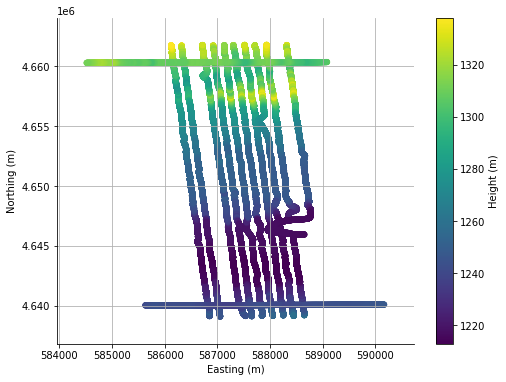

In [13]:
plt.figure(figsize=(8,6))
_ = FD1.scatter2D();

Plot all the data along the specified line



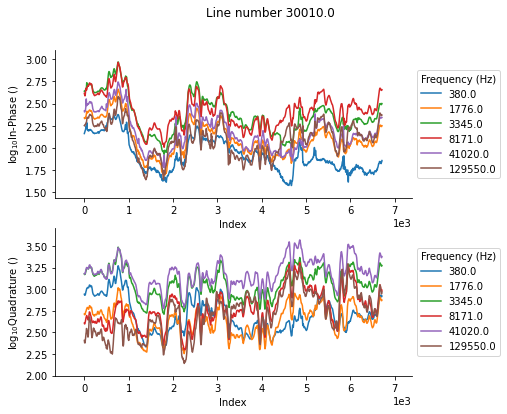

In [16]:
plt.figure(figsize=(8,6))
_ = FD1.plotLine(30010.0, log=10);

Or, plot specific channels in the data



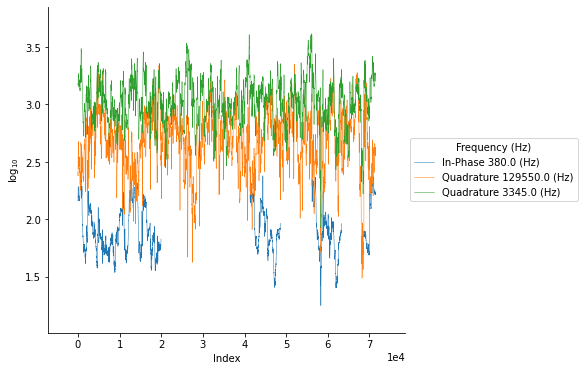

In [17]:
plt.figure(figsize=(8,6))
_ = FD1.plot(channels=[0,11,8], log=10, linewidth=0.5);

Read in a second data set



In [19]:
FD2 = FdemData()
FD2.read_csv(dataFilename=dataFolder + 'Resolve1.txt', systemFilename=dataFolder + 'FdemSystem1.stm')

We can create maps of the elevations in two separate figures



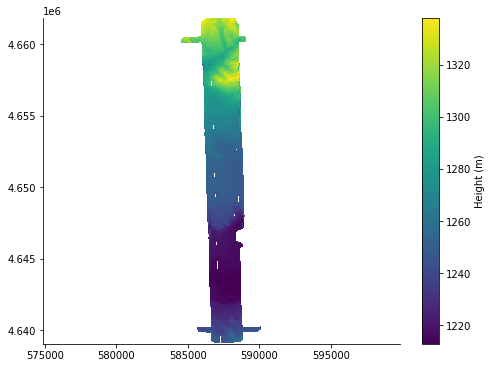

In [20]:
plt.figure(figsize=(8,6))
_ = FD1.mapPlot(dx=50.0, dy=50.0, mask = 200.0)
plt.axis('equal');

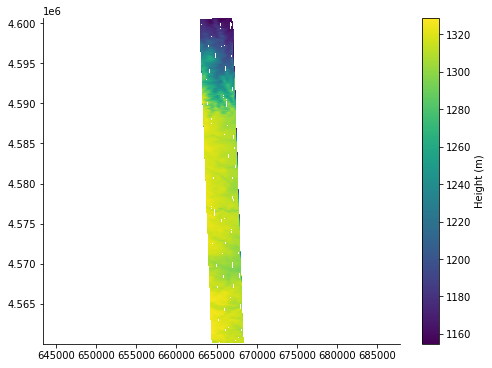

In [21]:
plt.figure(figsize=(8,6))
_ = FD2.mapPlot(dx=50.0, dy=50.0, mask = 200.0)
plt.axis('equal');

Or, we can plot both data sets in one figure to see their positions relative
to each other.

In this case, I use a 2D scatter plot of the data point co-ordinates, and pass
one of the channels as the colour.



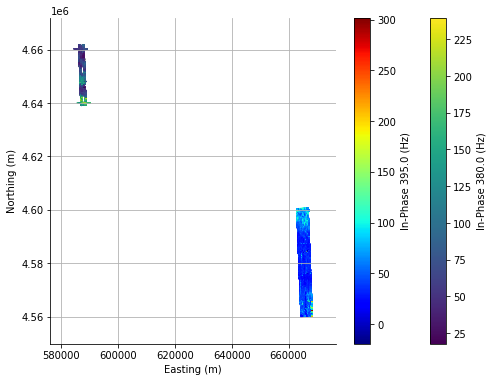

In [22]:
plt.figure(figsize=(8,6))
_ = FD1.scatter2D(s=1.0, c=FD1.dataChannel(0))
_ = FD2.scatter2D(s=1.0, c=FD2.dataChannel(0), cmap='jet');

Or, interpolate the values to create a gridded "map". mapChannel will
interpolate the specified channel number.



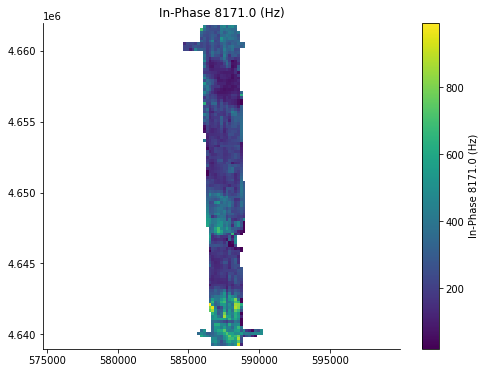

In [25]:
plt.figure(figsize=(8,6))
_ = FD1.mapData(channel=3, system=0, dx=200, dy=200, mask=250)
plt.axis('equal');

Export the data to VTK



In [ ]:
# FD1.toVTK('FD_one')
# FD2.toVTK('FD_two')

## Obtain a line from the data set



Take a look at the line numbers in the dataset



In [26]:
print(np.unique(FD1.lineNumber))

[30010. 30020. 30030. 30040. 30050. 30060. 30070. 30080. 30090. 30100.
 39010. 39020.]


In [27]:
L = FD1.line(30010.0)

A summary will now show the properties of the line.



In [28]:
print(L.summary)

3D Point Cloud: 
Number of Points: : 6710 
 Name: Easting (m)
    Shape: (6710,)
    Values: [586852.29 586852.23 586852.17 ... 586123.57 586123.2  586122.82]
 Name: Northing (m)
    Shape: (6710,)
    Values: [4639119.38 4639122.68 4639125.98 ... 4661765.26 4661768.84 4661772.42]
 Name: Height (m)
    Shape: (6710,)
    Values: [ 33.98  33.85  33.75 ... 125.08 125.1  125.16]
 Name: Elevation (m)
    Shape: (6710,)
    Values: [36.629 37.012 37.349 ... 28.313 28.218 28.115]
Data:          : 
# of Channels: 12 
# of Total Data: 80520 
Name: Fdem Data
    Shape: (6710, 12)
    Values: [[ 145.3  217.9  435.8 ...  405.7 1516.9  255.7]
 [ 145.7  217.2  436.5 ...  403.2 1509.6  252. ]
 [ 146.4  216.3  437.4 ...  400.9 1504.5  248.8]
 ...
 [  70.7  177.   314.1 ...  960.8 2366.4  910.7]
 [  71.3  177.7  315.3 ...  968.3 2378.2  919.1]
 [  72.1  178.4  316.6 ...  976.5 2391.   928.3]]

 Name: 
    Shape: (6710, 12)
    Values: [[ 14.53  21.79  43.58 ...  40.57 151.69  25.57]
 [ 14.57  21.72  4

And we can scatter2D the points in the line.



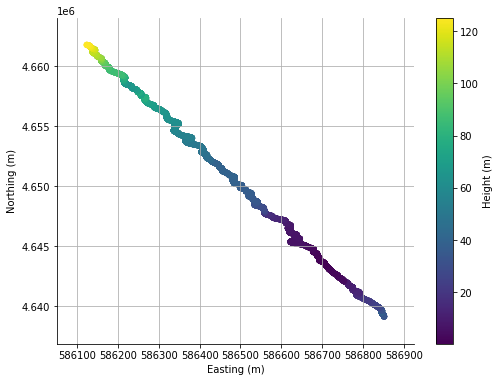

In [29]:
plt.figure(figsize=(8,6))
_ = L.scatter2D();

We can specify the axis along which to plot.
xAxis can be index, x, y, z, r2d, r3d



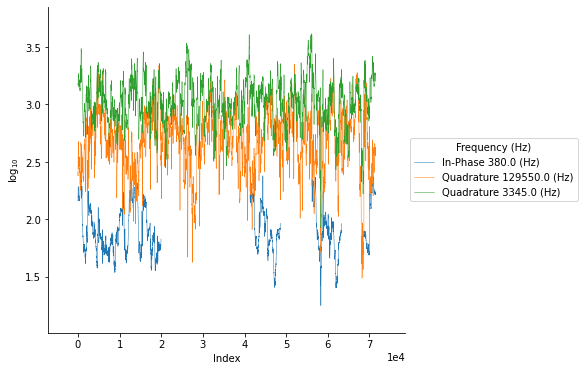

In [30]:
plt.figure(figsize=(8,6))
_ = FD1.plot(channels=[0,11,8], log=10, linewidth=0.5);

## Obtain a single datapoint from the data set

Checkout `Frequency domain datapoint` for an example
about how to use a datapoint once it is instantiated.



In [31]:
dp = FD1.datapoint(0)

## File Format for frequency domain data
Here we describe the file format for frequency domain data.

The data columns are read in according to the column names in the first line.

In this description, the column name or its alternatives are given followed by what the name represents.
Optional columns are also described.

### Required columns
line
    Line number for the data point
fid
    Unique identification number of the data point
x or northing or n
    Northing co-ordinate of the data point, (m)
y or easting or e
    Easting co-ordinate of the data point, (m)
z or alt
    Altitude of the transmitter coil above ground level (m)
elevation
    Elevation of the ground at the data point (m)
I_<frequency[0]> Q_<frequency[0]> ... I_<frequency[last]> Q_<frequency[last]>  - with the number and square brackets
    The measurements for each frequency specified in the accompanying system file.
    I is the real inphase measurement in (ppm)
    Q is the imaginary quadrature measurement in (ppm)
Optional columns
________________
InphaseErr[0] QuadratureErr[0] ... InphaseErr[nFrequencies] QuadratureErr[nFrequencies]
    Estimates of standard deviation for each inphase and quadrature measurement.
    These must appear after the data colums.

### Example Header
Line fid easting northing elevation height I_380 Q_380 ... ... I_129550 Q_129550



## File Format for a frequency domain system
.. role:: raw-html(raw)
   :format: html

The system file is structured using columns with the first line containing header information

Each subsequent row contains the information for each measurement frequency

freq
    Frequency of the channel
tor
    Orientation of the transmitter loop 'x', or 'z'
tmom
    Transmitter moment
tx, ty, tx
    Offset of the transmitter with respect to the observation locations
ror
    Orientation of the receiver loop 'x', or 'z'
rmom
    Receiver moment
rx, ry, rz
    Offset of the receiver with respect to the transmitter location

Example system files are contained in
`the supplementary folder`_ in this repository


See the Resolve.stm files.
